In [1]:
from labUtils.fba.fba_tools import load_model, load_fba_data

## Load the organism file.

# Load the experiment data

> If the data files are created by the pipeline, you must have 'df_flux.csv' and 'growth_rates.csv', created in different folders based on starin, averaging, etc.
>
> Check the parameters below to change the data source selection.

In [2]:
model = load_model("H:/ROBOT_SCIENTIST/E_coli/iML1515.json")
model

Name,iML1515
Memory address,20dbd189940
Number of metabolites,1877
Number of reactions,2712
Number of genes,1516
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [3]:
import pandas as pd

strain = "WT"
replication = "no_replicates"
gr_column= "mv_mu_max"
# replication = "replicates"
# gr_column= "mv_mu_max"

# replication = "post_replicates"
# gr_column= "mv_mu_max_mean"
# experiment = "mediabotJLF2"
# replication = "post_replicates"
# gr_column= "mv_mu_max_mean"
# replication = "replicates"
# gr_column= "mv_mu_max"

(df_data,
 fixed_columns, 
 medium_columns, 
 supplement_columns, 
 df_parsed_data) = load_fba_data(per_strain=True,
                                 replication = replication,
                                 strain=strain,
                                 #experiment=experiment,
                                 datasource_path="H:/ROBOT_SCIENTIST/E_coli/Growth_rates/2025-10-31-27/processed"
                                )


all_medium_columns = fixed_columns + medium_columns + supplement_columns    

print("=" * 50)
print("Fixed exchanges:")
print(fixed_columns)
print("=" * 50)
print("Medium exchanges:")
print(medium_columns[:10])
print(medium_columns[10:])
print("=" * 50)
print("Supplement exchanges:")
print(supplement_columns[:8])
print(supplement_columns[8:16])
print(supplement_columns[16:])

Fixed exchanges:
['EX_h2o_e', 'EX_mobd_e', 'EX_ni2_e', 'EX_o2_e', 'EX_tungs_e']
Medium exchanges:
['EX_ca2_e', 'EX_cl_e', 'EX_cobalt2_e', 'EX_cu2_e', 'EX_fe3_e', 'EX_h_e', 'EX_k_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_na1_e']
['EX_nh4_e', 'EX_pi_e', 'EX_so4_e', 'EX_zn2_e']
Supplement exchanges:
['EX_ade_e', 'EX_ala__L_e', 'EX_arg__L_e', 'EX_asn__L_e', 'EX_asp__L_e', 'EX_cys__L_e', 'EX_glc__D_e', 'EX_gln__L_e']
['EX_glu__L_e', 'EX_gly_e', 'EX_his__L_e', 'EX_ile__L_e', 'EX_leu__L_e', 'EX_lys__L_e', 'EX_met__L_e', 'EX_phe__L_e']
['EX_pro__L_e', 'EX_ser__L_e', 'EX_succ_e', 'EX_sucr_e', 'EX_thr__L_e', 'EX_trp__L_e', 'EX_tyr__L_e', 'EX_ura_e', 'EX_val__L_e']


# Solve FBA


> We using the "find_fba_solutions_scaling_factor" that adjust the uptakes bounds for best fit.

In [4]:
from labUtils.fba.fba_tools import find_fba_solutions_scaling_factor
df_data, df_fluxes, df_shadow_prices = find_fba_solutions_scaling_factor(df_data, 
                                                                         model,
                                                                         all_medium_columns,
                                                                         use_sfba=False,
                                                                         gr_column=gr_column,
                                                                        )

# IMPORTANT
## In the following, the 'solution_index' is a variable that selects the record in the 'combinded_data' dataframe will be plotted. You can check the 'combinded_data' dataframe, then, select the relevant index to study furthur.

In [5]:
solution_index = 3  # Change this index to visualize different solutions
assert df_data.iloc[solution_index]["fba_status"] == 'optimal', f"Solution at index {solution_index} is not optimal."
assert solution_index < len(df_fluxes), f"Solution index {solution_index} is out f bounds for fluxes list of length {len(df_fluxes)}."

row_experiment = df_data.iloc[solution_index]["experiment"]
row_well = df_data.iloc[solution_index]["well"]

# ORPT reaction

Seed reaction: ORPT
Requested search_depth: 0
Expansion mode: products_only
Nonzero only: True (threshold=1e-09)
Discovered reactions (topology): 1
Plotted reactions (after filter): 1
Discovered metabolites (unique): 4
Map output: iML1515.ORPT_map.json
Reactions per depth:
  depth 0: 1


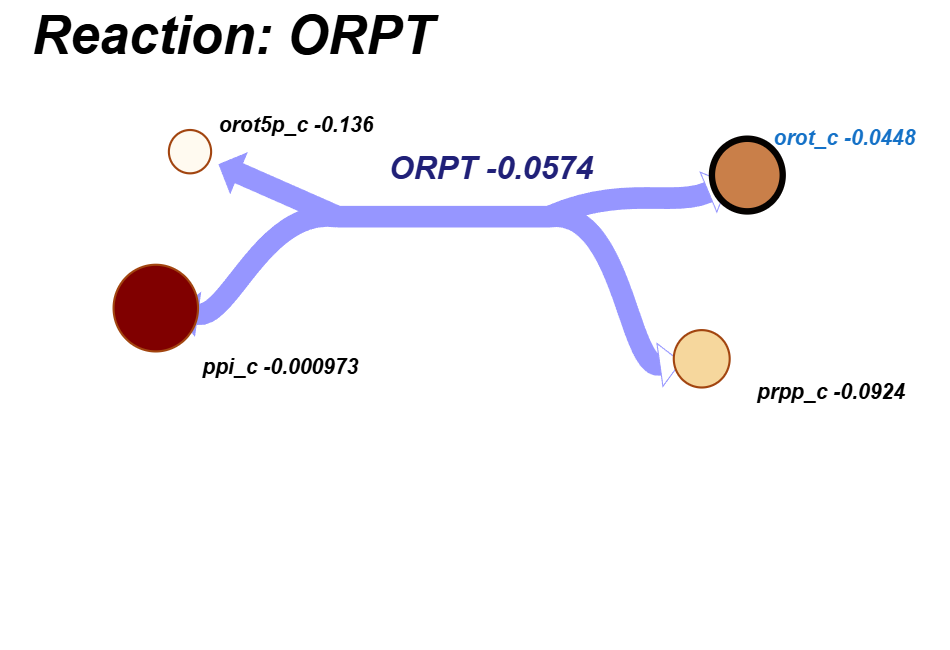

Builder(hide_all_labels=False, hide_secondary_metabolites=False, metabolite_data={'octapb_c': np.float64(-0.15…

In [25]:
from labUtils.fba.visualisations import build_reaction_escher_builder
# Example usage
builder_orpt = build_reaction_escher_builder(
    reaction_name="ORPT",
    df_fluxes=df_fluxes,
    df_shadow_prices=df_shadow_prices,
    model=model,
    solution_index=solution_index,
    search_depth=0,
    expansion_mode="products_only",
    nonzero_only=True,
    flux_threshold=1e-9,
    keep_seed_reaction=True,
    hide_secondary_metabolites=False,
    map_json_path="iML1515.ORPT_map.json",
    verbose=True,
 )
from IPython.display import Image, display
display(Image("iML1515.ORPT_map.png"))
display(builder_orpt)

# ORPT to PYR reactions

In [14]:
from labUtils.fba.visualisations import build_path_between_reactions_escher_builder
# Example usage: path from ORPT to PYK
builder_orpt_to_pyk = build_path_between_reactions_escher_builder(
    start_reaction_name="ORPT",
    end_reaction_name="PYK",
    df_fluxes=df_fluxes,
    df_shadow_prices=df_shadow_prices,
    model=model,
    solution_index=solution_index,
    nonzero_only=True,
    flux_threshold=1e-9,
    keep_endpoints=True,
    hide_secondary_metabolites=False,
    map_json_path="iML1515.ORPT_to_PYK.json",
    verbose=True,
 )
builder_orpt_to_pyk

Path search: ORPT -> PYK
Path length (reactions): 3
Reaction path:
  ORPT -> AACPS3 -> PYK
Nonzero only: True (threshold=1e-09)
Discovered metabolites (map unique): 13
Map output: iML1515.ORPT_to_PYK.json


Builder(hide_all_labels=False, hide_secondary_metabolites=False, metabolite_data={'octapb_c': np.float64(-0.15…

# OROT5p metabolite

In [8]:
from labUtils.fba.visualisations import build_metabolite_escher_builder

# Example usage: single metabolite neighborhood
builder_orot5p = build_metabolite_escher_builder(
    metabolite_name="orot5p_c",
    df_fluxes=df_fluxes,
    df_shadow_prices=df_shadow_prices,
    model=model,
    solution_index=solution_index,
    search_depth=1,
    nonzero_only=True,
    flux_threshold=1e-9,
    keep_seed_metabolite=True,
    hide_secondary_metabolites=False, hide_all_labels=False,
    exclude_metabolites=["h_c", "h2o_c", "pi_c", "atp_c", "adp_c"],
    map_json_path="iML1515.orot5p_c.depth1.json",
    verbose=True,
 )
builder_orot5p

Seed metabolite: orot5p_c
Requested search_depth: 1
Nonzero only: True (threshold=1e-09)
Excluded metabolites: 5
Discovered reactions (topology): 2
Plotted reactions (after filter): 2
Discovered metabolites (topology): 6
Discovered metabolites (map unique): 7
Map output: iML1515.orot5p_c.depth1.json
Reactions per depth:
  depth 0: 2


Builder(hide_all_labels=False, hide_secondary_metabolites=False, metabolite_data={'octapb_c': np.float64(-0.15…

# Reactions from metabolites 'orot5p' to 'pyr'

In [15]:
from labUtils.fba.visualisations import build_path_between_metabolites_escher_builder
# Example usage: metabolite-to-metabolite path
builder_orot5p_to_pyr = build_path_between_metabolites_escher_builder(
    start_metabolite_name="orot5p_c",
    end_metabolite_name="pyr_c",
    df_fluxes=df_fluxes,
    df_shadow_prices=df_shadow_prices,
    model=model,
    solution_index=solution_index,
    nonzero_only=True,
    flux_threshold=1e-9,
    keep_endpoints=True,
    hide_secondary_metabolites=False, hide_all_labels=False,
    exclude_metabolites=["h_c", "h2o_c", "pi_c", "atp_c", "adp_c"],
    map_json_path="iML1515.orot5p_c_to_pyr_c.json",
    verbose=True,
 )
builder_orot5p_to_pyr

Metabolite path search: orot5p_c -> pyr_c
Path length (reactions): 2
Reaction path:
  OMPDC -> ACHBS
Nonzero only: True (threshold=1e-09)
Excluded metabolites: 5
Discovered metabolites (map unique): 7
Map output: iML1515.orot5p_c_to_pyr_c.json


Builder(hide_all_labels=False, hide_secondary_metabolites=False, metabolite_data={'octapb_c': np.float64(-0.15…

# Reactions regulated by gene "pyrE"

In [10]:
from labUtils.fba.visualisations import build_gene_escher_builder
builder_gene = build_gene_escher_builder(
    # gene_id="b0150",  # or gene name if unique in model
    gene_name="pyrE",
    df_fluxes=df_fluxes,
    df_shadow_prices=df_shadow_prices,
    model=model,
    solution_index=solution_index,
    search_depth=0,
    expansion_mode="both",
    nonzero_only=True,
    flux_threshold=1e-9,
    keep_seed_reactions=True,
    hide_secondary_metabolites=False,
    map_json_path="iML1515.gene.b0150.depth1.both.json",
    verbose=True,

)
builder_gene

Seed gene: b3642 (pyrE)
Requested search_depth: 0
Expansion mode: both
Nonzero only: True (threshold=1e-09)
Discovered reactions (topology): 1
Plotted reactions (after filter): 1
Discovered metabolites (unique): 4
Map output: iML1515.gene.b0150.depth1.both.json
Reactions per depth:
  depth 0: 1


Builder(hide_all_labels=False, hide_secondary_metabolites=False, metabolite_data={'octapb_c': np.float64(-0.15…

# Wild type vs Perturbed fluxes comparision
> After loading and solving FBA for the SLAB example, we can see the differences between fluxes

In [11]:
strain = "SLAB"

(df_data_SLAB,
 _, 
 _, 
 _, 
 df_parsed_data_SLAB) = load_fba_data(per_strain=True,
                                 replication = replication,
                                 strain=strain,
                                 #experiment=experiment,
                                 datasource_path="H:/ROBOT_SCIENTIST/E_coli/Growth_rates/2025-10-31-27/processed"
                                )

In [12]:
from labUtils.fba.fba_tools import find_fba_solutions_scaling_factor
df_data_SLAB, df_fluxes_SLAB, df_shadow_prices_SLAB = find_fba_solutions_scaling_factor(df_data_SLAB, 
                                                                         model,
                                                                         all_medium_columns,
                                                                         use_sfba=False,
                                                                         gr_column=gr_column,
                                                                        )

### It is possible to change the 'diff_threshold' to increase or decrease the number of ractions here.

In [22]:
from labUtils.fba.visualisations import build_flux_comparison_escher_builder
builder_diff = build_flux_comparison_escher_builder(model,
                                                    df_fluxes_wt=df_fluxes,
                                                    df_fluxes_pert=df_fluxes_SLAB,
                                                    df_shadow_prices_wt=df_shadow_prices,
                                                    df_shadow_prices_pert=df_shadow_prices_SLAB,
                                                    wt_index=0,
                                                    pert_index=0,
                                                    comparison_mode="diff_above",#"pert_nonzero_wt_zero", #"wt_nonzero_pert_zero",
                                                    diff_threshold=6,
                                                    hide_all_labels=False,)
display(builder_diff)

Comparison mode: diff_above
WT index: 0
Pert index: 0
Flux threshold: 1e-09
Diff threshold: 6
Selected reactions: 6
Map output: iML1515.compare.diff_above.wt0.pert0.json


Builder(hide_all_labels=False, hide_secondary_metabolites=True, metabolite_data={'octapb_c': np.float64(0.0), …